# Visualization 3

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import requests
import re

# new import statements
import geopandas as gpd
from shapely.geometry import Point, Polygon, box

In [8]:
# Find the path for "naturalearth_lowres"
path = gpd.datasets.get_path("naturalearth_lowres")
# Read the shapefile for "naturalearth_lowres" and
# set index using "name" column
gdf = gpd.read_file(path).set_index("name")

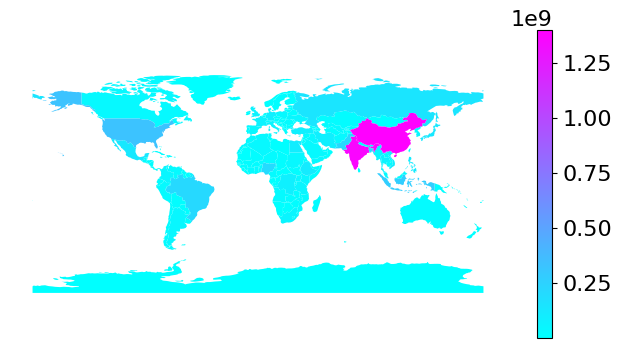

In [19]:
# Color the map based on population column and set cmap="cool"
ax = gdf.plot(figsize=(8,4), column="pop_est", legend=True, cmap="cool")
ax.set_axis_off()

#### Create a map where countries with >100M people are red, others are gray.

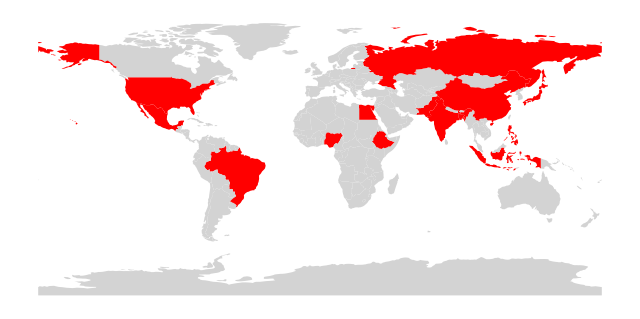

In [20]:
# Create a map where countries with >100M people are red, others are gray

# Add a new column called color to gdf and set default value to "lightgray"
gdf["color"] = "lightgray"
# Boolean indexing to set color to red for countries with "pop_est" > 1e8
gdf.loc[gdf["pop_est"] > 1e8, "color"] = "red"
# Create the plot
ax = gdf.plot(figsize=(8,4), color=gdf["color"])
ax.set_axis_off()

### Shapely shapes

- `from shapely.geometry import Point, Polygon, box`
- `Polygon([(<x1>, <y1>), (<x2>, <y2>), (<x3>, <y3>), ...])`
- `box(<x1>, <x2>, <y1>, <y2>)`
- `Point(<x>, <y>)`
- `<shapely object>.buffer(<size>)`
    - example: `Point(5, 5).buffer(3)` creates a circle
- Shapely methods:
    - `union`:  any point that is in either shape (OR)
    - `intersection`: any point that is in both shapes (AND)
    - `difference`: subtraction
    - `intersects`: do they overlap?

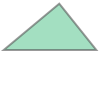

In [21]:
triangle = Polygon([(0, 0), (1.2, 1), (2, 0)])   # triangle
triangle

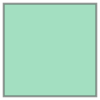

In [22]:
box1 = box(0, 0, 1, 1)
box1

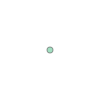

In [23]:
point = Point(5, 5)
point

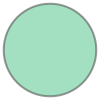

In [24]:
circle = point.buffer(1)
circle

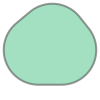

In [25]:
triangle_buffer = triangle.buffer(3)
triangle_buffer

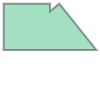

In [26]:
triangle.union(box1)   # any point that is in either shape (OR)

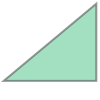

In [27]:
triangle.intersection(box1)   # any point that is in both shapes (AND)

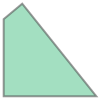

In [28]:
triangle.difference(box1)   # subtraction

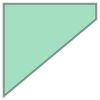

In [29]:
box1.difference(triangle)   # subtraction

In [30]:
triangle.intersects(box1) # do they overlap?

True

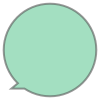

In [31]:
# is the point "near" (<6 units) the triangle?
triangle.union(point.buffer(6))

In [32]:
triangle.intersects(point.buffer(6))

True

#### Extacting "Europe" data from "naturalearth_lowres"

<AxesSubplot:>

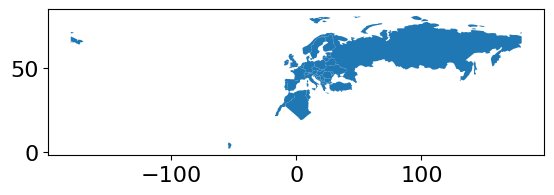

In [33]:
# Europe bounding box
b = box(-10.67, 34.5, 31.55, 71.05)

# attempt 1
gdf[gdf.intersects(b)].plot()

/home/msyamkumar/.local/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


<AxesSubplot:>

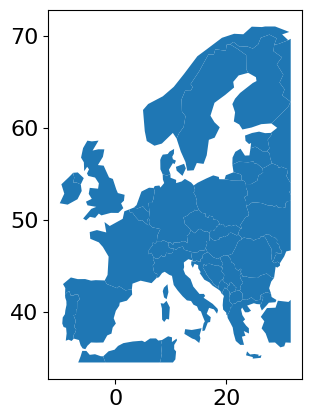

In [34]:
eur1 = gdf.intersection(b)
eur1.plot()

In [35]:
eur2 = eur1[~eur1.is_empty]
eur2

name
Russia              MULTIPOLYGON (((31.54002 52.74205, 31.30520 53...
Norway              POLYGON ((29.39955 69.15692, 28.59193 69.06478...
France              MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...
Tunisia             POLYGON ((8.14098 34.65515, 8.37637 35.47988, ...
Algeria             POLYGON ((-1.79299 34.52792, -2.16991 35.16840...
Sweden              POLYGON ((11.46827 59.43239, 12.30037 60.11793...
Belarus             POLYGON ((29.22951 55.91834, 29.37157 55.67009...
Ukraine             POLYGON ((30.74875 46.58310, 30.37761 46.03241...
Poland              POLYGON ((23.52754 53.47012, 23.80493 53.08973...
Austria             POLYGON ((16.90375 47.71487, 16.34058 47.71290...
Hungary             POLYGON ((22.64082 48.15024, 22.71053 47.88219...
Moldova             POLYGON ((26.85782 48.36821, 27.52254 48.46712...
Romania             POLYGON ((28.67978 45.30403, 29.14972 45.46493...
Lithuania           POLYGON ((26.58828 55.16718, 25.76843 54.84696...
Latvia         

<AxesSubplot:>

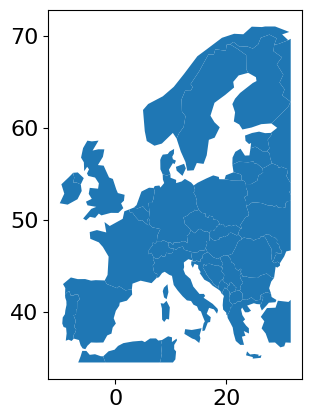

In [36]:
eur2.plot()

In [ ]:
eur = df.intersection(eur_window) # intersects difference?
eur = eur[~eur.is_empty] # why filter?

In [ ]:
eur.plot()

In [ ]:
df.intersection(eur_window)

In [ ]:
df.intersection(eur_window).is_empty

In [ ]:
df.intersects(eur_window)

#### Centroids of European countries

In [ ]:
# plot the centroids
ax = eur.plot(facecolor="lightgray", edgecolor="k")
eur.centroid.plot(ax=ax)

In [ ]:
eur.crs

In [ ]:
eur2 = eur.to_crs("EPSG:3035")
eur2.crs

In [ ]:
ax = eur2.plot(facecolor="lightgray", edgecolor="k")
eur2.centroid.plot(ax=ax)

#### How much error does lat/long computation introduce?

In [ ]:
ax = eur2.plot(facecolor="lightgray", edgecolor="k")
eur2.centroid.plot(ax=ax, color="k") # black => correct
eur.centroid.to_crs("EPSG:3035").plot(ax=ax, color="r")  # red => miscalculated

In [ ]:
#type(eur2.iloc[0])
#type(eur2).__mro__

#### Area of European countries

In [ ]:
eur2.area # area in sq meters

What is the area in **sq miles**?

In [ ]:
# careful!  some countries (e.g., Russia) were cropped when we did intersection
(eur2.area / 1000 / 1000 / 2.59).sort_values(ascending=False)

In [ ]:
# eur.area # area on screen, not real area

### Madison area emergency services

In [ ]:
city = gpd.read_file("City_Limit.zip").to_crs("epsg:32616")

In [ ]:
city.crs

In [ ]:
water = gpd.read_file("Lakes_and_Rivers.zip").to_crs(city.crs)
fire = gpd.read_file("Fire_Stations.zip").to_crs(city.crs)
police = gpd.read_file("Police_Stations.zip").to_crs(city.crs)

In [ ]:
url = "https://maps.cityofmadison.com/arcgis/rest/services/Public/OPEN_DATA/MapServer/2/query?outFields=*&where=1%3D1&f=geojson"
police2 = gpd.read_file(url).to_crs(city.crs)

In [ ]:
ax = city.plot(color="lightgray")
water.plot(color="lightblue", ax=ax)
fire.plot(color="red", ax=ax, marker="+", label="Fire")
police2.plot(color="blue", ax=ax, label="Police")
ax.legend(loc="upper left", frameon=False)
ax.set_axis_off()

In [ ]:
fire.to_file("fire.geojson")

### Geocoding: street address => lat / lon

In [ ]:
url = "https://www.cityofmadison.com/fire/daily-reports"
r = requests.get(url)
r

In [ ]:
r.raise_for_status() # give me an exception if not 200 (e.g., 404)

In [ ]:
# pd.read_html(url)

In [ ]:
print(r.text)

Find all **span** tags with **streeAddress** using regex.

In [ ]:
addrs = re.findall(r'<span itemprop="streetAddress">(.*?)</span>', r.text)[:-1]
addrs = pd.Series(addrs)
addrs

In [ ]:
gpd.tools.geocode("E. Geneva Circle; Madison, WI")

In [ ]:
gpd.tools.geocode("700 block N. Fair Oaks Avenue; Madison, WI")

In [ ]:
fixed_addrs = addrs.str.replace(" block ", " ") + "; Madison, WI"
fixed_addrs

In [ ]:
incidents = gpd.tools.geocode(fixed_addrs, provider="nominatim", user_agent="cs320bot").dropna()
incidents

In [ ]:
ax = city.plot(color="lightgray")
water.plot(color="lightblue", ax=ax)
fire.plot(color="red", ax=ax, marker="+", label="Fire")
police2.plot(color="blue", ax=ax, label="Police")
incidents.to_crs(city.crs).plot(ax=ax, color="k")
ax.legend(loc="upper left", frameon=False)
ax.set_axis_off()